In [1]:
import pandas as pd

In [2]:
#File is too large. Limited no. of. rows are read
df = pd.read_csv('OnlineRetail.csv',nrows = 10000)

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
9995,537224,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,12/5/2010 16:24,9.95,13174.0,United Kingdom
9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2,12/5/2010 16:24,4.95,13174.0,United Kingdom
9997,537224,21363,HOME SMALL WOOD LETTERS,2,12/5/2010 16:24,4.95,13174.0,United Kingdom
9998,537224,21556,CERAMIC STRAWBERRY MONEY BOX,2,12/5/2010 16:24,2.55,13174.0,United Kingdom


RFM (Recency, Frequency and Monetary) segmentation allows marketers to 
target specific clusters of customers 
with communications that are much more relevant for their particular behavior 
– and thus generate much higher rates of response, plus increased loyalty and
customer lifetime value. Like other segmentation methods, RFM segmentation is 
a powerful way to identify groups of customers for special treatment. 
RFM stands for recency, frequency and monetary – more about each of these shortly.

ref:https://www.optimove.com/resources/learning-center/rfm-segmentation

In [4]:
import datetime
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate']).apply(lambda x: x.date())
#df['recent_date'] = df.groupby(by='CustomerID').max()['InvoiceDate']
max_date = df['InvoiceDate'].max()
df['dates']= pd.to_numeric((max_date+datetime.timedelta(days=1)-df['InvoiceDate']).dt.days,
                           downcast='integer')
df['total']= df['Quantity']*df['UnitPrice']

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,dates,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,5,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,5,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,5,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,5,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,5,20.34
...,...,...,...,...,...,...,...,...,...,...
9995,537224,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-05,9.95,13174.0,United Kingdom,1,19.90
9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2,2010-12-05,4.95,13174.0,United Kingdom,1,9.90
9997,537224,21363,HOME SMALL WOOD LETTERS,2,2010-12-05,4.95,13174.0,United Kingdom,1,9.90
9998,537224,21556,CERAMIC STRAWBERRY MONEY BOX,2,2010-12-05,2.55,13174.0,United Kingdom,1,5.10


In [6]:
df_new = df.groupby(by='CustomerID').agg({
    'dates':'min','InvoiceNo':'count', 'total':'sum'})

In [7]:
df_new.columns = ['Recency','Frequency', "Monetary"]
df_new

,Recency,Frequency,Monetary
CustomerID,,,
12395.0,3,12,346.10
12427.0,3,10,303.50
12431.0,5,14,358.25
12433.0,5,73,1919.14
12471.0,4,1,-17.00
...,...,...,...
18156.0,1,55,206.23
18168.0,4,31,246.35
18225.0,3,1,-31.80


(array([ 76.,   0.,  54., 111.,  82.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

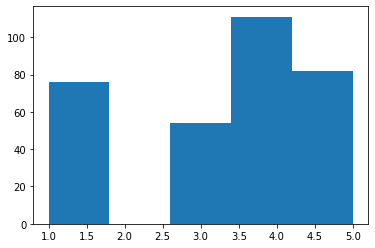

In [8]:
#plot data
import matplotlib.pyplot as plt
plt.hist(df_new['Recency'],5,align='mid')

In [9]:
df_new['Recency'].value_counts()

4    111
5     82
1     76
3     54
Name: Recency, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.6430317176546402


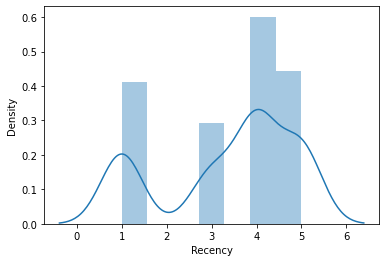

In [10]:
import seaborn as sns
sns.distplot(df_new['Recency'],hist=True,kde=True)
print(df_new['Recency'].skew())

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.793093228397655


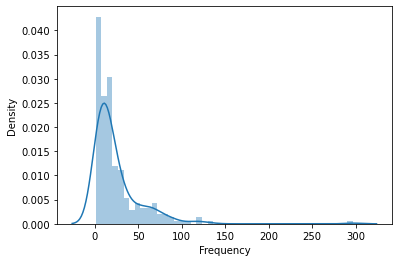

In [11]:
sns.distplot(df_new['Frequency'],hist=True,kde=True)
print(df_new['Frequency'].skew())

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


6.624695331427898


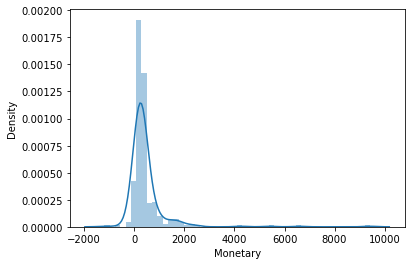

In [12]:
sns.distplot(df_new['Monetary'],hist=True,kde=True)
print(df_new['Monetary'].skew())

In [13]:
import numpy as np
square_recency = np.square(df_new['Recency'])
log_freq = np.log(df_new['Frequency'])
log_mon= np.log(df_new['Monetary'])
print(f'square_recency_skewness={square_recency.skew()}')
print(f'log_frequency_skewness={log_freq.skew()}')
print(f'log_monetary_skewness={log_mon.skew()}')

square_recency_skewness=-0.15614214525333336
log_frequency_skewness=-0.42345134750578783
log_monetary_skewness=0.4736925527734043


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

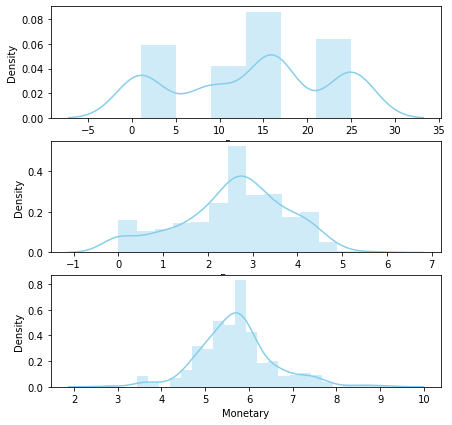

In [14]:
f, axes = plt.subplots(3, 1, figsize=(7, 7))
sns.distplot( square_recency , color="skyblue", ax=axes[0])
sns.distplot( log_freq , color="skyblue", ax=axes[1])
sns.distplot( log_mon , color="skyblue", ax=axes[2])

In [15]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_new)
df_normalized = scaler.transform(df_new)
df_normalized[0:10]

array([[-0.25938748, -0.41619395, -0.12422723],
       [-0.25938748, -0.48633777, -0.17628426],
       [ 1.102924  , -0.34605012, -0.10937998],
       [ 1.102924  ,  1.72319278,  1.79802122],
       [ 0.42176826, -0.80198499, -0.56793395],
       [-1.62169895,  2.10898382,  1.29683181],
       [-0.25938748, -0.66169734,  0.21047745],
       [-1.62169895,  1.37247364,  1.31872998],
       [ 1.102924  , -0.13561864,  0.4986974 ],
       [-0.25938748, -0.76691308, -0.45367733]])

Text(0.5, 1.0, 'Elbow curve (Inertia)')

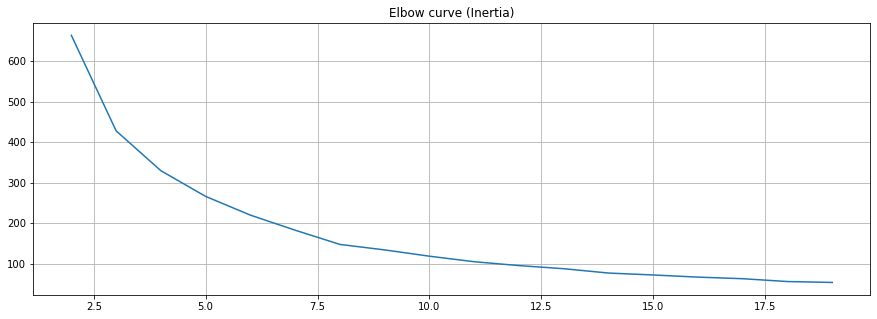

In [16]:
from sklearn.cluster import KMeans

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_normalized)
    distorsions.append(kmeans.inertia_)
    

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
#sum of squared distances
plt.title('Elbow curve (Inertia)')

In [17]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_normalized)
kmeans.labels_

array([3, 3, 0, 5, 3, 2, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3,
       0, 3, 5, 1, 3, 0, 3, 0, 0, 7, 3, 3, 2, 1, 0, 0, 1, 2, 1, 3, 0, 3,
       3, 3, 3, 2, 0, 1, 3, 3, 5, 3, 7, 3, 0, 0, 3, 1, 3, 0, 1, 0, 0, 3,
       0, 0, 0, 1, 4, 3, 1, 1, 7, 3, 0, 7, 0, 3, 3, 0, 2, 5, 3, 3, 0, 3,
       1, 3, 3, 3, 3, 0, 3, 5, 3, 3, 3, 3, 1, 3, 5, 3, 3, 0, 1, 1, 5, 3,
       3, 0, 2, 3, 3, 7, 0, 0, 5, 5, 3, 3, 3, 1, 1, 1, 3, 0, 3, 3, 3, 2,
       5, 1, 1, 4, 3, 3, 0, 3, 3, 0, 1, 1, 3, 3, 0, 7, 2, 1, 0, 1, 3, 3,
       3, 2, 1, 0, 1, 0, 5, 3, 3, 1, 1, 5, 5, 0, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 5, 1, 2, 2, 1, 3, 3, 1, 3, 0, 7, 7, 1, 3, 0,
       0, 3, 1, 3, 1, 3, 3, 7, 0, 1, 5, 0, 5, 2, 1, 1, 1, 1, 1, 3, 0, 3,
       3, 0, 3, 0, 0, 3, 1, 3, 3, 7, 3, 3, 1, 0, 1, 3, 5, 3, 5, 3, 0, 1,
       0, 1, 3, 3, 0, 1, 2, 1, 0, 3, 0, 5, 1, 3, 3, 5, 1, 3, 0, 0, 7, 3,
       1, 3, 0, 3, 7, 3, 0, 3, 3, 0, 5, 0, 3, 3, 0, 3, 3, 0, 3, 1, 3, 7,
       3, 3, 2, 6, 3, 1, 1, 0, 3, 0, 0, 5, 5, 3, 3,

In [18]:
df_new['rfm_group'] = kmeans.labels_
df_mean = df_new.groupby(by='rfm_group').agg({'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean'})
df_mean.columns = ['Mean Recency','Mean Frequency', 'Mean Monetary Value']
df_mean

,Mean Recency,Mean Frequency,Mean Monetary Value
rfm_group,,,
0,5.000000,12.691176,300.035294
1,1.000000,24.306452,354.692903
2,1.444444,85.888889,942.310556
3,3.725191,11.770992,205.581756
4,4.500000,53.000000,7996.250000
5,4.148148,62.481481,465.278148
6,4.000000,297.000000,5391.210000
7,3.642857,11.500000,1742.419286


In [92]:
plt.rcParams["figure.figsize"] = (10,10)
# plt.scatter(df_new['Monetary'],df_new['Frequency'],c=kmeans.labels_)
# plt.xlabel('Monetary Value($)',fontsize=18)
# plt.ylabel('Frequency',fontsize=18)

# plt.legend()

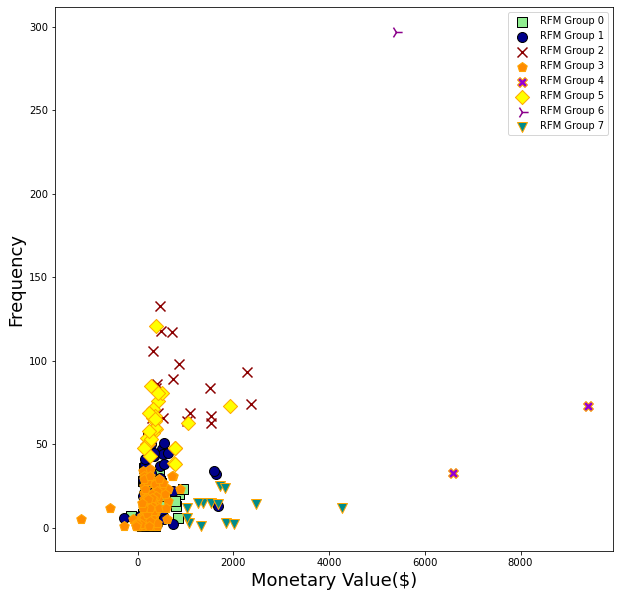

In [94]:
plt.scatter(df_new.loc[df_new['rfm_group'] ==0, ['Monetary']],
           df_new.loc[df_new['rfm_group'] ==0, ['Frequency']],
            c='lightgreen', marker='s',edgecolor='black', label='RFM Group 0',s=100)
plt.scatter(df_new.loc[df_new['rfm_group'] ==1, ['Monetary']],
           df_new.loc[df_new['rfm_group'] ==1, ['Frequency']],
            c='darkblue', marker='o',edgecolor='black', label='RFM Group 1',s=100)
plt.scatter(df_new.loc[df_new['rfm_group'] ==2, ['Monetary']],
           df_new.loc[df_new['rfm_group'] ==2, ['Frequency']],
            c='darkred', marker='x',edgecolor='red', label='RFM Group 2',s=100)
plt.scatter(df_new.loc[df_new['rfm_group'] ==3, ['Monetary']],
           df_new.loc[df_new['rfm_group'] ==3, ['Frequency']],
            c='darkorange', marker='p',edgecolor='orange', label='RFM Group 3',s=100)

plt.scatter(df_new.loc[df_new['rfm_group'] ==4, ['Monetary']],
           df_new.loc[df_new['rfm_group'] ==4, ['Frequency']],
            c='darkviolet', marker='X',edgecolor='orange', label='RFM Group 4',s=100)
plt.scatter(df_new.loc[df_new['rfm_group'] ==5, ['Monetary']],
           df_new.loc[df_new['rfm_group'] ==5, ['Frequency']],
            c='yellow', marker='D',edgecolor='orange', label='RFM Group 5',s=100)

plt.scatter(df_new.loc[df_new['rfm_group'] ==6, ['Monetary']],
           df_new.loc[df_new['rfm_group'] ==6, ['Frequency']],
            c='darkmagenta', marker='4',edgecolor='orange', label='RFM Group 6',s=150)
plt.scatter(df_new.loc[df_new['rfm_group'] ==7, ['Monetary']],
           df_new.loc[df_new['rfm_group'] ==7, ['Frequency']],
            c='darkcyan', marker='v',edgecolor='orange', label='RFM Group 7',s=100)
plt.xlabel('Monetary Value($)',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.legend()
plt.show()
plt.savefig('RFM.png')
plt.close()